In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data import

In [21]:
df_excel=pd.read_excel("QVI_transaction_data.xlsx")
df_customer=pd.read_csv("QVI_purchase_behaviour.csv")

# Transaction Data Table 

In [16]:
df_excel.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# Number of rows

In [17]:
df_excel.shape

(264836, 8)

In [22]:
len(df_excel)

264836

In [23]:
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [24]:
df_customer.shape

(72637, 3)

In [25]:
merged_data = pd.merge(df_excel, df_customer, on="LYLTY_CARD_NBR", how="right")
print(merged_data.head())

    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43359          1            1002       2        58   
2  43531          1            1003       3        52   
3  43532          1            1003       4       106   
4  43406          1            1004       5        96   

                                PROD_NAME  PROD_QTY  TOT_SALES  \
0  Natural Chip        Compny SeaSalt175g         2        6.0   
1   Red Rock Deli Chikn&Garlic Aioli 150g         1        2.7   
2   Grain Waves Sour    Cream&Chives 210G         1        3.6   
3  Natural ChipCo      Hony Soy Chckn175g         1        3.0   
4          WW Original Stacked Chips 160g         1        1.9   

               LIFESTAGE PREMIUM_CUSTOMER  
0  YOUNG SINGLES/COUPLES          Premium  
1  YOUNG SINGLES/COUPLES       Mainstream  
2         YOUNG FAMILIES           Budget  
3         YOUNG FAMILIES           Budget  
4  OLDER SINGLES/COUPLES       Mainstrea

In [26]:
merged_data.shape

(264836, 10)

In [28]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 22.2+ MB


In [39]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43359,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,43531,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,43532,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,43406,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [40]:
#changing the date from a number string to a date format
from datetime import date, timedelta
start = date(1899,12,30)

new_date_format = []

for date in merged_data["DATE"]:
    delta = timedelta(date)
    new_date_format.append(start + delta)

In [41]:
merged_data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(merged_data["DATE"].dtype)


datetime64[ns]


In [42]:
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream


In [57]:
merged_data["PROD_NAME"].head()

0    Natural Chip        Compny SeaSalt175g
1     Red Rock Deli Chikn&Garlic Aioli 150g
2     Grain Waves Sour    Cream&Chives 210G
3    Natural ChipCo      Hony Soy Chckn175g
4            WW Original Stacked Chips 160g
Name: PROD_NAME, dtype: object

In [58]:
#separate the product name from the weight
merged_data['WEIGHT'] = merged_data['PROD_NAME'].str.extract("(\d+)")
merged_data['WEIGHT'] = pd.to_numeric(merged_data['WEIGHT'])
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210
3,2019-03-08,1,1003,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,YOUNG FAMILIES,Budget,175
4,2018-11-02,1,1004,5,96,WW Original Stacked Chips 160g,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160


In [59]:
merged_data["PROD_NAME"].unique() #checking if there are only chips

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

In [61]:
split_prods = merged_data["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]', ' ').str.split()

In [62]:
word_counts = {}

def count_words(line):
    for word in line:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
split_prods.apply(lambda line: count_words(line))
print(pd.Series(word_counts).sort_values(ascending=False))
 #sorting the frequency of words in order of highest to lowest frequency

Chips     49770
Kettle    41288
Smiths    28860
Salt      27976
Cheese    27890
          ...  
Onin       1432
Pc         1431
Garden     1419
NCC        1419
Fries      1418
Length: 198, dtype: int64


In [67]:
#Removing salsa products as we want just chips
merged_data = merged_data[~merged_data["PROD_NAME"].str.contains(r"[Ss]alsa")]
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt175G,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150G,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210
3,2019-03-08,1,1003,4,106,Natural Chipco Hony Soy Chckn175G,1,3.0,YOUNG FAMILIES,Budget,175
4,2018-11-02,1,1004,5,96,Ww Original Stacked Chips 160G,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160


In [69]:
#summary statistics such as mean, min and max to see if there are any obvious outliers 
print(merged_data.describe(), '\n')
print(merged_data.info())

           STORE_NBR  LYLTY_CARD_NBR        TXN_ID       PROD_NBR  \
count  246742.000000    2.467420e+05  2.467420e+05  246742.000000   
mean      135.051098    1.355310e+05  1.351311e+05      56.351789   
std        76.787096    8.071528e+04  7.814772e+04      33.695428   
min         1.000000    1.000000e+03  1.000000e+00       1.000000   
25%        70.000000    7.001500e+04  6.756925e+04      26.000000   
50%       130.000000    1.303670e+05  1.351830e+05      53.000000   
75%       203.000000    2.030840e+05  2.026538e+05      87.000000   
max       272.000000    2.373711e+06  2.415841e+06     114.000000   

            PROD_QTY      TOT_SALES         WEIGHT  
count  246742.000000  246742.000000  246742.000000  
mean        1.908062       7.321322     175.585178  
std         0.659831       3.077828      59.434727  
min         1.000000       1.700000      70.000000  
25%         2.000000       5.800000     150.000000  
50%         2.000000       7.400000     170.000000  
75%    

In [70]:
#there are 2 outliers in prod qty which needs to be removed
merged_data.sort_values(by="PROD_QTY", ascending=False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
221625,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380G,200,650.0,OLDER FAMILIES,Premium,380
221626,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380G,200,650.0,OLDER FAMILIES,Premium,380
218544,2018-08-15,223,223025,223075,8,Smiths Crinkle Cut Chips Original 170G,5,14.5,YOUNG FAMILIES,Mainstream,170
91147,2019-05-18,94,94098,93080,114,Kettle Sensations Siracha Lime 150G,5,23.0,YOUNG FAMILIES,Budget,150
87093,2018-08-19,90,90215,88934,95,Sunbites Whlegrn Crisps Frch/Onin 90G,5,8.5,RETIREES,Premium,90


In [72]:
#there are 2 outliers in prod qty removed
merged_data = merged_data[merged_data["PROD_QTY"] < 6]
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt175G,2,6.0,YOUNG SINGLES/COUPLES,Premium,175
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150G,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210
3,2019-03-08,1,1003,4,106,Natural Chipco Hony Soy Chckn175G,1,3.0,YOUNG FAMILIES,Budget,175
4,2018-11-02,1,1004,5,96,Ww Original Stacked Chips 160G,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160


In [73]:
#checking if the outlier is still there
len(merged_data[merged_data["LYLTY_CARD_NBR"] == 226000])


0

In [76]:
#summary of transaction count by date
merged_data["DATE"].describe()

<ipython-input-76-b159fb92ebd9>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merged_data["DATE"].describe()


count                  246740
unique                    364
top       2018-12-24 00:00:00
freq                      865
first     2018-07-01 00:00:00
last      2019-06-30 00:00:00
Name: DATE, dtype: object

In [78]:
#the date column is 364 meaning 1 is not available


In [79]:
pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()).difference(merged_data["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [80]:
#25-12 is christmas day which is the lost date in the data

In [83]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end=merged_data["DATE"].max()), name="DATE"), merged_data, on="DATE", how="left")
trans_by_date = check_null_date["DATE"]

<ipython-input-99-a58fcf0d601c>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  Ts = trans_by_date[(trans_by_date.index >= pd.datetime(2018,7,1)) & (trans_by_date.index < pd.datetime(2019,6,1))].sort_index()


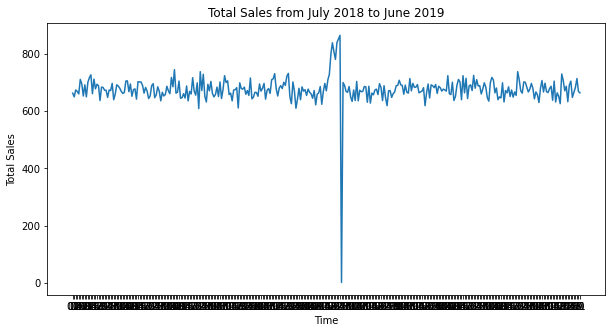

In [99]:

trans_by_date = check_null_date["DATE"].value_counts()
Ts = trans_by_date[(trans_by_date.index >= pd.datetime(2018,7,1)) & (trans_by_date.index < pd.datetime(2019,6,1))].sort_index()
Ts.index = Ts.index.strftime('%d')
ax = Ts.plot(figsize=(10,5))
ax.set_xticks(np.arange(len(Ts)))
ax.set_xticklabels(Ts.index)
plt.title("Total Sales from July 2018 to June 2019")
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-102-88e6c479e871>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()


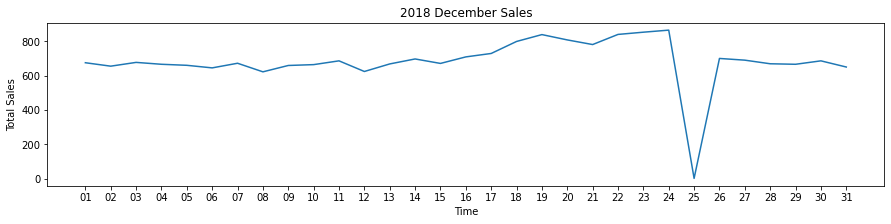

In [102]:
#now let's filter to dec
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.xlabel('Time')
plt.ylabel('Total Sales')
plt.show()

In [109]:
#pack size
merged_data["WEIGHT"].head()

0    175
1    150
2    210
3    175
4    160
Name: WEIGHT, dtype: int64

In [110]:
merged_data["WEIGHT"].unique()

array([175, 150, 210, 160, 165, 110, 330, 170, 180, 135,  70, 220, 190,
       270,  90, 200, 134, 380, 125, 250])

<AxesSubplot:ylabel='Frequency'>

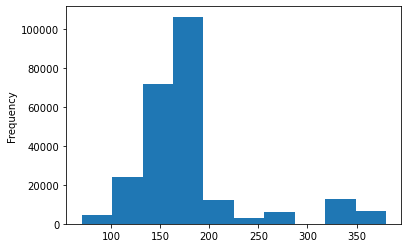

In [112]:
merged_data["WEIGHT"].plot.hist()

In [131]:
#creating brand name
left = merged_data["PROD_NAME"].str.partition()
merged_data['BRAND'] = left[0]
merged_data.head()


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER,WEIGHT,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny Seasalt175G,2,6.0,YOUNG SINGLES/COUPLES,Premium,175,Natural
1,2018-09-16,1,1002,2,58,Red Rock Deli Chikn&Garlic Aioli 150G,1,2.7,YOUNG SINGLES/COUPLES,Mainstream,150,Red
2,2019-03-07,1,1003,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,YOUNG FAMILIES,Budget,210,Grain
3,2019-03-08,1,1003,4,106,Natural Chipco Hony Soy Chckn175G,1,3.0,YOUNG FAMILIES,Budget,175,Natural
4,2018-11-02,1,1004,5,96,Ww Original Stacked Chips 160G,1,1.9,OLDER SINGLES/COUPLES,Mainstream,160,Ww


In [132]:
#since most of the brands are repeated,we need to combine them.
merged_data['BRAND'].replace('Ncc', 'Natural', inplace = True)
merged_data['BRAND'].replace('Ww', 'Woolworths', inplace = True)
merged_data['BRAND'].replace('Ccs', 'CCS', inplace = True)
merged_data['BRAND'].replace('Smith', 'Smiths', inplace = True)
merged_data['BRAND'].replace('Dorito', 'Doritos', inplace = True)
merged_data['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
merged_data['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
merged_data['BRAND'].replace('Ww', 'Woolworths', inplace = True)
merged_data['BRAND'].replace('Snbts', 'Sunbites', inplace = True)
merged_data['BRAND'].unique()

array(['Natural', 'Red Rock Deli', 'Grainwaves', 'Woolworths', 'Cheetos',
       'Infuzions', 'Doritos', 'Smiths', 'Kettle', 'CCS', 'Tostitos',
       'Cobs', 'Burger', 'Thins', 'Tyrrells', 'Cheezels', 'Twisties',
       'Sunbites', 'Pringles', 'French'], dtype=object)

<AxesSubplot:>

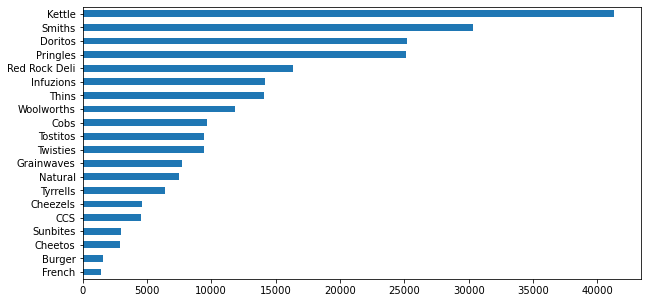

In [136]:
merged_data["BRAND"].value_counts(ascending=True).plot.barh(figsize=(10,5))
#from the graph below, it can be seen that kettle had the highest sales

# Examining customer data

In [139]:
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [140]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [141]:
len(df_customer)

72637

In [142]:
#checking for null
df_customer.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [143]:
#there is no null value

# Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to
the client:
- Who spends the most on chips (total sales), describing customers by lifestage and
how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What is the average chip price by customer segment

In [146]:
total_sales = pd.DataFrame(merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].agg(["sum", "mean"]))
total_sales.sort_values(ascending=False, by="sum")

sum      mean
LIFESTAGE              PREMIUM_CUSTOMER                     
OLDER FAMILIES         Budget            156863.75  7.291241
YOUNG SINGLES/COUPLES  Mainstream        147582.20  7.551279
RETIREES               Mainstream        145168.95  7.269352
YOUNG FAMILIES         Budget            129717.95  7.302705
OLDER SINGLES/COUPLES  Budget            127833.60  7.444305
                       Mainstream        124648.50  7.306049
                       Premium           123537.55  7.459997
RETIREES               Budget            105916.30  7.445786
OLDER FAMILIES         Mainstream         96413.55  7.281440
RETIREES               Premium            91296.65  7.461315
YOUNG FAMILIES         Mainstream         86338.25  7.226772
MIDAGE SINGLES/COUPLES Mainstream         84734.25  7.637156
YOUNG FAMILIES         Premium            78571.70  7.285951
OLDER FAMILIES         Premium            75242.60  7.232779
YOUNG SINGLES/COUPLES  Budget             57122.10  6.663023
MIDAGE SINGLES/COUPLES Premium            54443.85  7.152371
YOUNG SINGLES/COUPLES  Premium            39052.30  6.673325
MIDAGE SINGLES/COUPLES Budget             33345.70  7.108442
NEW FAMILIES           Budget             20607.45  7.297256
                       Mainstream         15979.70  7.313364
                       Premium            10760.80  7.231720

<AxesSubplot:ylabel='LIFESTAGE,PREMIUM_CUSTOMER'>

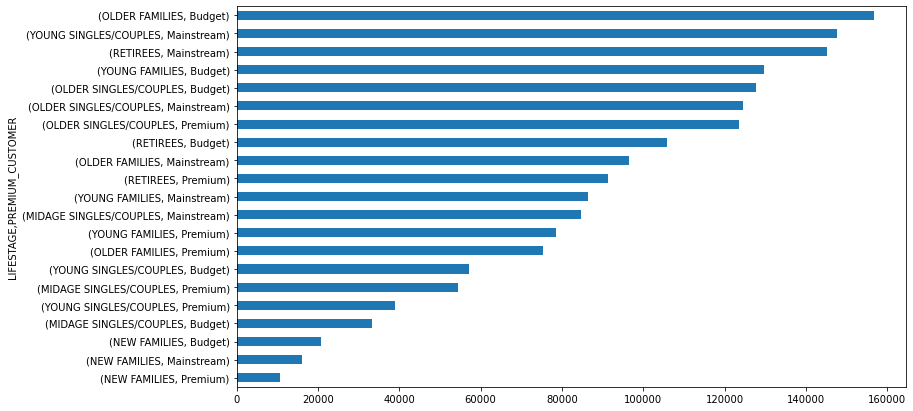

In [147]:
total_sales["sum"].sort_values().plot.barh(figsize=(12,7))

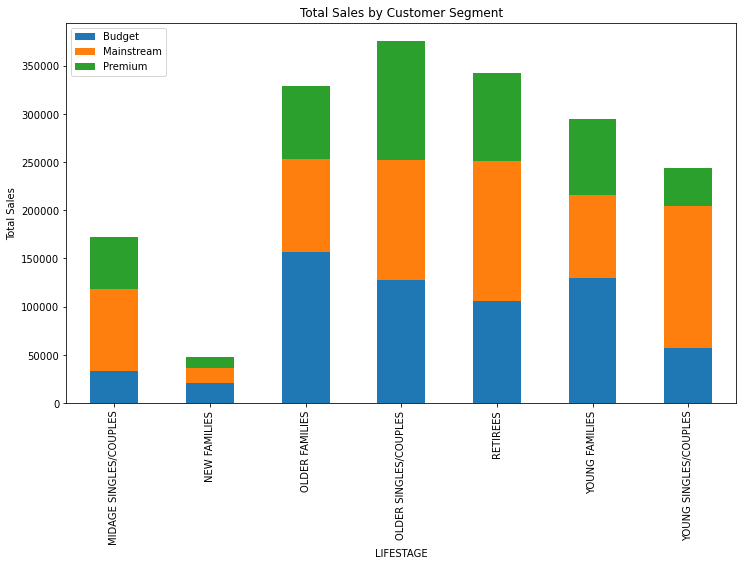

In [150]:
total_sales = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
total_sales.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [151]:
#it can be seen that the top 3 sales came from budget older families, mainstream young singles/couples and mainstream retirees.


In [156]:
# customers are in each segment
cust_segment = merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False)
pd.DataFrame(cust_segment)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  7917
RETIREES               Mainstream                  6358
OLDER SINGLES/COUPLES  Mainstream                  4858
                       Budget                      4849
                       Premium                     4682
OLDER FAMILIES         Budget                      4611
RETIREES               Budget                      4385
YOUNG FAMILIES         Budget                      3953
RETIREES               Premium                     3812
YOUNG SINGLES/COUPLES  Budget                      3647
MIDAGE SINGLES/COUPLES Mainstream                  3298
OLDER FAMILIES         Mainstream                  2788
YOUNG FAMILIES         Mainstream                  2685
YOUNG SINGLES/COUPLES  Premium                     2480
YOUNG FAMILIES         Premium                     2398
MIDAGE SINGLES/COUPLES Premium                     2369
OLDER FAMILIES         Premium                     2231
MIDAGE SINGLES/COUPLES Budget                      1474
NEW FAMILIES           Budget                      1087
                       Mainstream                   830
                       Premium                      575

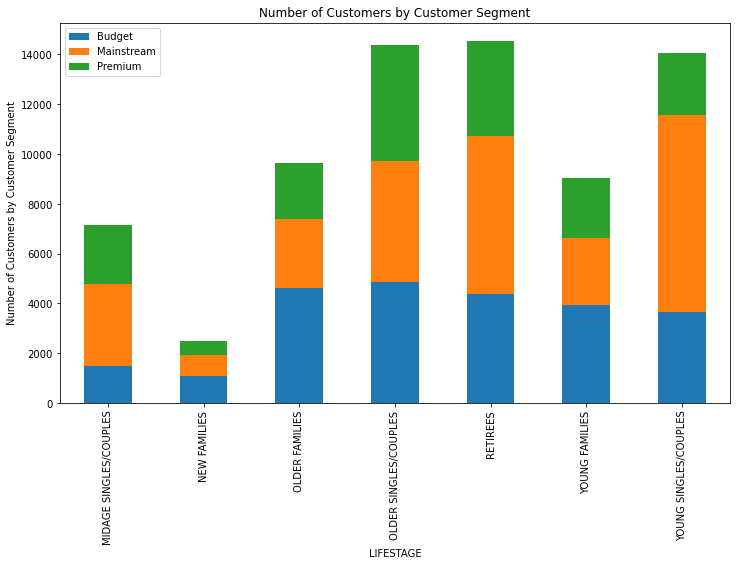

In [157]:
cust_segment = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
cust_segment.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers by Customer Segment')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments but
this is not a major driver for the Budget - Older families segment.
Higher sales may also be driven by more units of chips being bought per customer. 

In [165]:
#the average number of units per customer in lifesatge and premium customer
cust_avg = merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
cust_avg = pd.DataFrame(cust_avg, columns = {'Average Unit per Customer'})
cust_avg.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.255380
Budget,OLDER FAMILIES,9.076773
Premium,OLDER FAMILIES,9.071717
Budget,YOUNG FAMILIES,8.722995
Premium,YOUNG FAMILIES,8.716013


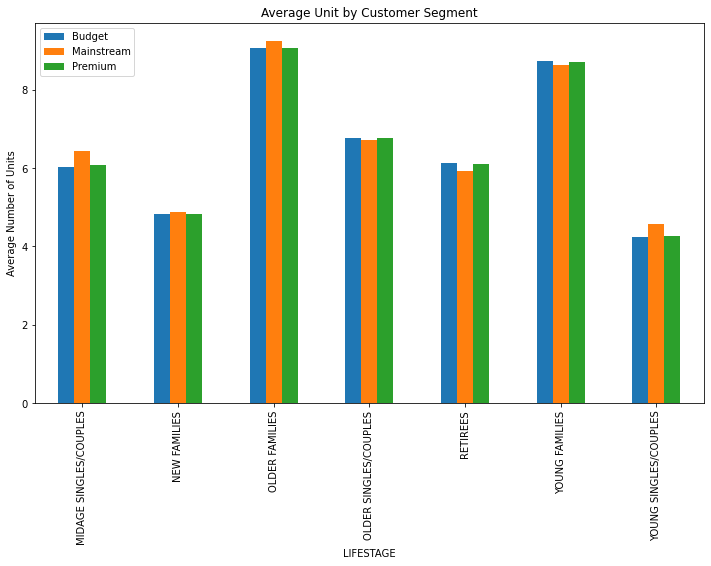

In [166]:
cust_avgPlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
cust_avgPlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

In [167]:
#from the above, it can be seen that older familes and younger familes buy alot of chips averagely.

In [168]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price = merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / merged_data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.074043
                 MIDAGE SINGLES/COUPLES        3.994449
                 NEW FAMILIES                  3.935887
Budget           RETIREES                      3.932731
                 NEW FAMILIES                  3.931969

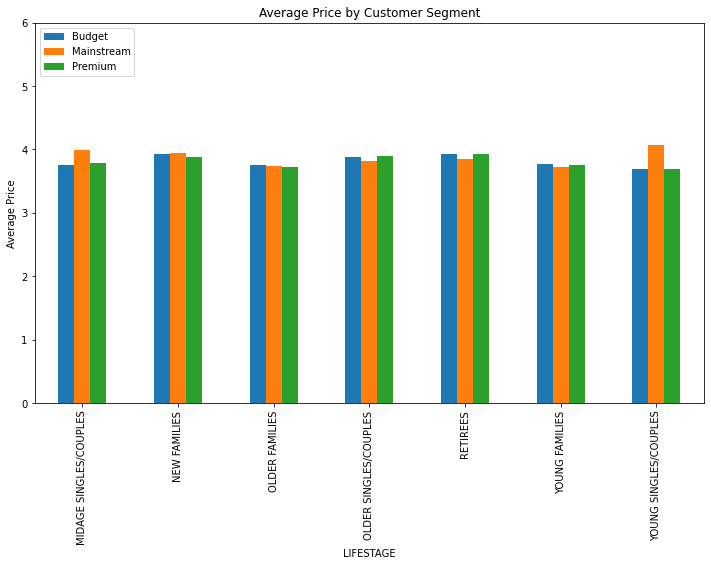

In [169]:
#in graph
avgPricePlot = pd.DataFrame(merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avgPricePlot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

In [171]:
#Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

In [172]:
from scipy.stats import ttest_ind

In [173]:
mainstream = merged_data["PREMIUM_CUSTOMER"] == "Mainstream"
young_midage = (merged_data["LIFESTAGE"] == "MIDAGE SINGLES/COUPLES") | (merged_data["LIFESTAGE"] == "YOUNG SINGLES/COUPLES")

budget_premium = (merged_data["PREMIUM_CUSTOMER"] == "Budget") | (merged_data["PREMIUM_CUSTOMER"] == "Premium")

a = merged_data[young_midage & mainstream]["TOT_SALES"]
b = merged_data[young_midage & budget_premium]["TOT_SALES"]
stat, pval = ttest_ind(a.values, b.values, equal_var=False)

print(pval)
pval < 0.0000001

1.8346459081778177e-237


True

The t-test results in a p-value of 1.8346459081778177e-237, i.e. the unit price for mainstream,
young and mid-age singles and couples ARE significantly higher than
that of budget or premium, young and midage singles and couples.

# INSIGHTS

In [ ]:
It can be agreed that, 
Older families (Budget)
Young Singles/Couples (Mainstream) 
and Retirees (Mainstream) are the highest 3 total sales contributor segments.

Young Singles/Couples (Mainstream) and Retirees (Mainstream)high contribution can be attributed to their highest population. 

(Mainstream, Young Singles/Couples) are more likely to pay more per packet of chips than their premium and budget counterparts